

> Dimension/4



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Colab Notebooks/catsdogs_dct_big/train'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Colab Notebooks/catsdogs_dct_big/test'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Görüntülenen çıkış son 5000 satıra kısaltıldı.
/content/drive/MyDrive/Colab Notebooks/catsdogs_dct_big/test/cats/cat.11446.jpg
/content/drive/MyDrive/Colab Notebooks/catsdogs_dct_big/test/cats/cat.1945.jpg
/content/drive/MyDrive/Colab Notebooks/catsdogs_dct_big/test/cats/cat.2059.jpg
/content/drive/MyDrive/Colab Notebooks/catsdogs_dct_big/test/cats/cat.556.jpg
/content/drive/MyDrive/Colab Notebooks/catsdogs_dct_big/test/cats/cat.2673.jpg
/content/drive/MyDrive/Colab Notebooks/catsdogs_dct_big/test/cats/cat.10564.jpg
/content/drive/MyDrive/Colab Notebooks/catsdogs_dct_big/test/cats/cat.1045.jpg
/content/drive/MyDrive/Colab Notebooks/catsdogs_dct_big/test/cats/cat.5320.jpg
/content/drive/MyDrive/Colab Notebooks/catsdogs_dct_big/test/cats/cat.1451.jpg
/content/drive/MyDrive/Colab Notebooks/catsdogs_dct_big/test/cats/cat.10485.jpg
/content/drive/MyDrive/Colab Notebooks/catsdogs_dct_big/test/cats/cat.2394.jpg
/content/drive/MyDrive/Colab Notebooks/catsdogs_dct_big/test/cats/cat.10154.jpg
/c

In [ ]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import cv2
import matplotlib.pyplot as plt
import time

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/catsdogs_dct_big/train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/catsdogs_dct_big/test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 23000 images belonging to 2 classes.
Found 7000 images belonging to 2 classes.


In [ ]:
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [ ]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
start = time.time()

# 30 epoch with dimension/4
history = cnn.fit(x = training_set, validation_data = test_set, epochs = 30)

print("Total time: ", time.time() - start, "seconds")

Epoch 1/30
719/719 [==============================] - 4927s 7s/step - loss: 0.6659 - accuracy: 0.5988 - val_loss: 0.7272 - val_accuracy: 0.5334
Epoch 2/30
719/719 [==============================] - 69s 96ms/step - loss: 0.6501 - accuracy: 0.6157 - val_loss: 0.6755 - val_accuracy: 0.5701
Epoch 3/30
719/719 [==============================] - 68s 95ms/step - loss: 0.6440 - accuracy: 0.6237 - val_loss: 0.6447 - val_accuracy: 0.6221
Epoch 4/30
719/719 [==============================] - 69s 96ms/step - loss: 0.6402 - accuracy: 0.6252 - val_loss: 0.6461 - val_accuracy: 0.6184
Epoch 5/30
719/719 [==============================] - 68s 95ms/step - loss: 0.6399 - accuracy: 0.6297 - val_loss: 0.6815 - val_accuracy: 0.5746
Epoch 6/30
719/719 [==============================] - 68s 94ms/step - loss: 0.6371 - accuracy: 0.6322 - val_loss: 0.6581 - val_accuracy: 0.6003
Epoch 7/30
719/719 [==============================] - 68s 94ms/step - loss: 0.6318 - accuracy: 0.6382 - val_loss: 0.6544 - val_accuracy:

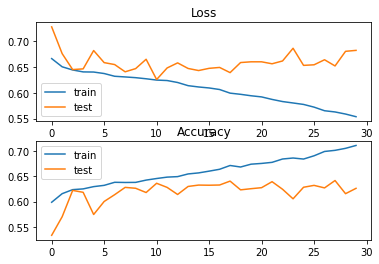

In [ ]:
from matplotlib import pyplot
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
start = time.time()

# 30 epoch V2 with dimension/4
history = cnn.fit(x = training_set, validation_data = test_set, epochs = 30)

print("Total time: ", time.time() - start, "seconds")

Epoch 1/30
719/719 [==============================] - 7768s 11s/step - loss: 0.6778 - accuracy: 0.5829 - val_loss: 0.6613 - val_accuracy: 0.5767
Epoch 2/30
719/719 [==============================] - 77s 107ms/step - loss: 0.6505 - accuracy: 0.6139 - val_loss: 0.6712 - val_accuracy: 0.5770
Epoch 3/30
719/719 [==============================] - 78s 108ms/step - loss: 0.6462 - accuracy: 0.6211 - val_loss: 0.6308 - val_accuracy: 0.6349
Epoch 4/30
719/719 [==============================] - 77s 107ms/step - loss: 0.6395 - accuracy: 0.6272 - val_loss: 0.6420 - val_accuracy: 0.6274
Epoch 5/30
719/719 [==============================] - 77s 107ms/step - loss: 0.6373 - accuracy: 0.6305 - val_loss: 0.6708 - val_accuracy: 0.5894
Epoch 6/30
719/719 [==============================] - 77s 107ms/step - loss: 0.6338 - accuracy: 0.6363 - val_loss: 0.6518 - val_accuracy: 0.6180
Epoch 7/30
719/719 [==============================] - 78s 108ms/step - loss: 0.6336 - accuracy: 0.6358 - val_loss: 0.6616 - val_ac

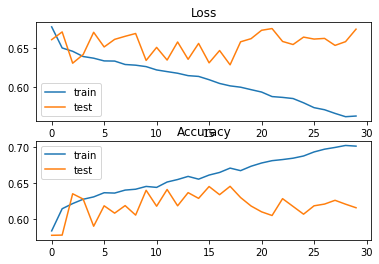

In [ ]:
from matplotlib import pyplot
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
start = time.time()

# 20 epoch with dimension/4
history = cnn.fit(x = training_set, validation_data = test_set, epochs = 20)

print("Total time: ", time.time() - start, "seconds")

Epoch 1/20
719/719 [==============================] - 7550s 11s/step - loss: 0.6693 - accuracy: 0.5920 - val_loss: 0.7556 - val_accuracy: 0.5254
Epoch 2/20
719/719 [==============================] - 85s 119ms/step - loss: 0.6495 - accuracy: 0.6213 - val_loss: 0.6493 - val_accuracy: 0.6187
Epoch 3/20
719/719 [==============================] - 87s 120ms/step - loss: 0.6448 - accuracy: 0.6245 - val_loss: 0.6441 - val_accuracy: 0.6239
Epoch 4/20
719/719 [==============================] - 91s 126ms/step - loss: 0.6388 - accuracy: 0.6272 - val_loss: 0.6534 - val_accuracy: 0.6199
Epoch 5/20
719/719 [==============================] - 92s 128ms/step - loss: 0.6383 - accuracy: 0.6295 - val_loss: 0.6407 - val_accuracy: 0.6343
Epoch 6/20
719/719 [==============================] - 86s 120ms/step - loss: 0.6362 - accuracy: 0.6327 - val_loss: 0.6973 - val_accuracy: 0.5980
Epoch 7/20
719/719 [==============================] - 85s 119ms/step - loss: 0.6328 - accuracy: 0.6317 - val_loss: 0.6349 - val_ac

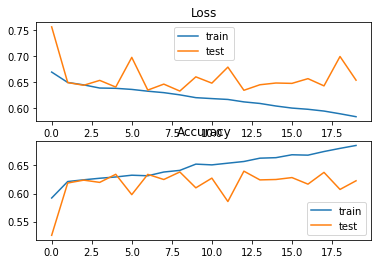

In [ ]:
from matplotlib import pyplot
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

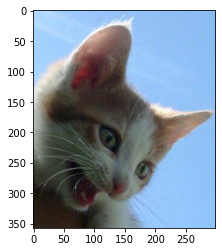

/content/drive/MyDrive/Colab Notebooks/catsdogs/demo_test/cat1.jpg
1/1 [==============================] - 0s 131ms/step
1
cat


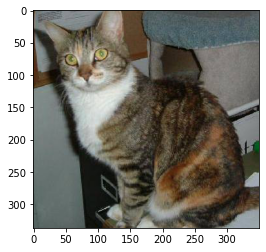

/content/drive/MyDrive/Colab Notebooks/catsdogs/demo_test/cat2.jpg
1/1 [==============================] - 0s 18ms/step
2
dog


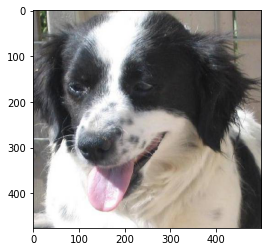

/content/drive/MyDrive/Colab Notebooks/catsdogs/demo_test/dog1.jpg
1/1 [==============================] - 0s 19ms/step
3
cat


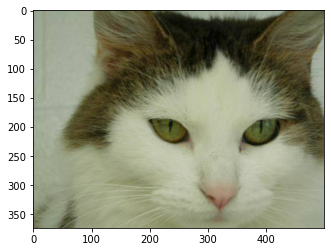

/content/drive/MyDrive/Colab Notebooks/catsdogs/demo_test/cat3.jpg
1/1 [==============================] - 0s 19ms/step
4
dog


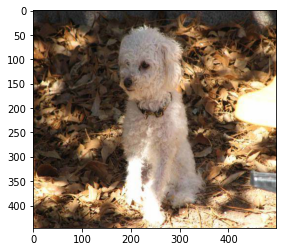

/content/drive/MyDrive/Colab Notebooks/catsdogs/demo_test/dog3.jpg
1/1 [==============================] - 0s 19ms/step
5
dog


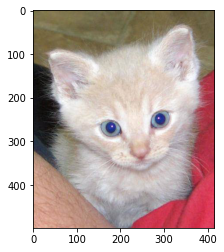

/content/drive/MyDrive/Colab Notebooks/catsdogs/demo_test/cat4.jpg
1/1 [==============================] - 0s 19ms/step
6
dog


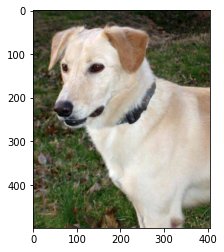

/content/drive/MyDrive/Colab Notebooks/catsdogs/demo_test/dog2.jpg
1/1 [==============================] - 0s 19ms/step
7
cat


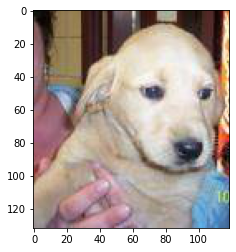

/content/drive/MyDrive/Colab Notebooks/catsdogs/demo_test/dog4.jpg
1/1 [==============================] - 0s 18ms/step
8
cat


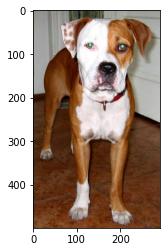

/content/drive/MyDrive/Colab Notebooks/catsdogs/demo_test/dog5.jpg
1/1 [==============================] - 0s 19ms/step
9
dog


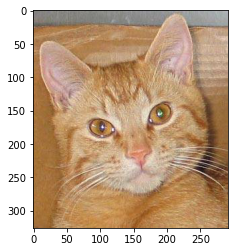

/content/drive/MyDrive/Colab Notebooks/catsdogs/demo_test/cat6.jpg
1/1 [==============================] - 0s 18ms/step
10
cat


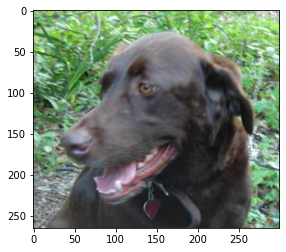

/content/drive/MyDrive/Colab Notebooks/catsdogs/demo_test/dog6.jpg
1/1 [==============================] - 0s 19ms/step
11
dog


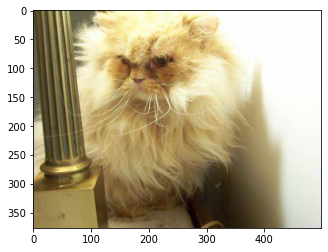

/content/drive/MyDrive/Colab Notebooks/catsdogs/demo_test/cat5.jpg
1/1 [==============================] - 0s 19ms/step
12
cat


In [ ]:
import numpy as np
import keras
from keras.preprocessing import image
from tensorflow.keras.utils import img_to_array
import matplotlib.pyplot as plt

from matplotlib import pyplot as plt
from matplotlib import image as mpimg
 

demo_test = "/content/drive/MyDrive/Colab Notebooks/catsdogs/demo_test"
folder_dir = "/content/drive/MyDrive/Colab Notebooks/catsdogs/demo_test"
temp = 0
for demo_image in os.listdir(demo_test):
  #print(demo_image)
  tempPath = os.path.join(folder_dir, demo_image)
  image = mpimg.imread(tempPath)
  plt.imshow(image)
  plt.show()
  print(tempPath)
  image = keras.utils.load_img(tempPath, target_size = (64, 64))
  image = img_to_array(image)
  image = np.expand_dims(image, axis = 0)
  result = cnn.predict(image)
  training_set.class_indices
  temp = temp+1
  print(temp)
  if result[0][0] == 1:
    prediction = 'dog'
  else:
    prediction = 'cat'
  print(prediction)
